<h1><center>Wrangle and Analyze Data</center></h1>

<span style="color: green;"> Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL. </span>

   
<span style="color: green;"> The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." </span>
    
    
<span style="color: green;"> WeRateDogs has over 4 million followers and has received international media coverage. WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon. </span>


In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import requests
import os
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
!pip install  --upgrade tweepy==4.4

# Step 1: Gathering Data

 <span style="color: blue;">Three types of dataset will be used;</span>

1- twitter_df : Loaded data from twitter_archive_enhanced.csv

2- images_df : Loaded data from image_predictions.tsv

3- tweet_json : Twitter API & json

## Source 1: csv data

In [2]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

## Gathering Source 2: tsv data , image prediction, from url

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

images_df = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf-8')
images_df.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

## Gathering Source 3: json txt data from twitter API

auth = tweepy.OAuthHandler('X', 'X')

auth.set_access_token('X', 'X')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True)

In [4]:
json_df = pd.read_json('tweet-json.txt', lines = True, encoding='utf-8')
json_df.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

# Step 2: Assessing Data


<span style="color: red;">To meet specifications, the following issues must be assessed.</span>

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean `at least 8 quality issues` and `at least 2 tidiness issues` in this dataset.

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Assesing Source 1 : twitter_df 

In [5]:
#Visual Assesment
twitter_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [6]:
#programmatic assessment
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We have got 2.356 entries and 17 columns. Total memory usage of the dataframe is 313.0+ KB.

### Assesing Source 2 : images_df

In [7]:
#Visual Assessment
images_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [8]:
#Programmatic Assessment
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Assesing Source 3 : tweet_json

In [9]:
#Visual Assessment
json_df

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

In [10]:
#Programmatic Assessment
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Cleaning

## Copy all of the datasets to save the originals

In [11]:
twitter_df_clean = twitter_df.copy()
images_df_clean = images_df.copy()
json_df_clean = json_df.copy()

### Retweeted tweets based unique on user_id : twitter_df_clean

In [12]:
twitter_df_clean.retweeted_status_user_id.count()

181

### Retweet tweets : json_df_clean

In [13]:
json_df_clean['retweeted_status'].count()

179

## Define :

### Lack of quality and how to fix it:

* Delete columns will not be used from all datasets.

* Delete retweeted_status that are not null from all twitter_df_clean.

> twitter_df:

* Replace the words that not refer any names in the name columns with NaN (i.e. all words start with a lower case).

* Replace None values with NaN in "doggo","floofer","pupper","puppo" columns.

* Splitting the timestamp column, aiming for only having date column.

* Correcting data types.

* Remove the columns for tweets that retweeted("retweeted_status") to access tweets send by the account.

* Correcting 'rating_denominator' column (max 10).

> images_df:

* Renaming nondescriptive column names.

> json_df:

* Renaming id as tweet_id.

### Lack of tidiness and how to fix it:

* Collect all dog types in one column and delete "doggo", "floofer", "pupper" and "puppo" columns. 

* Merge all datasets.

### Quality 1- Replace None values with NaN in "doggo","floofer","pupper","puppo" columns and the whole blanks in twitter_df_clean in case there is. 

In [14]:
type_list = ['doggo','pupper', 'floofer', 'puppo' ]
for i in type_list:
       twitter_df_clean[i] = twitter_df_clean[i].replace('None', '')

### Tideness 1- Collecting all dog types in one column in twitter_df_clean.

In [15]:
twitter_df_clean['dog_type'] = twitter_df_clean.doggo.str.cat(twitter_df_clean.floofer).str.cat(twitter_df_clean.pupper).str.cat(twitter_df_clean.puppo)

twitter_df_clean = twitter_df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test: 

In [16]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_type                    2356 

#### Filling the empty spaces with NaN values.

In [17]:
twitter_df_clean['dog_type'] = twitter_df_clean['dog_type'].replace('', np.nan)

#### Test:

In [18]:
twitter_df_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name dog_type  
0                  10  Phineas      NaN  
1                  10    Tilly      NaN

### Quality 2: Replace the words in twitter_df_clean['name']; 

* not refer any names in the "name" i.e. all words start with a lower case

* columns with None 
 
* "a" 

In [19]:
twitter_df_clean.replace(to_replace = twitter_df_clean.name.str.islower(), value = np.nan, inplace = True)

In [20]:
twitter_df_clean['name'] = twitter_df_clean['name'].replace('None', np.nan)

In [21]:
twitter_df_clean['name'] = twitter_df_clean['name'].replace('a', np.nan)

#### Test:

In [22]:
twitter_df_clean['name'].value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 955, dtype: int64

In [23]:
twitter_df_clean['name'].isnull().sum()

800

In [24]:
twitter_df_clean['name'].tail(2)

2354    NaN
2355    NaN
Name: name, dtype: object

### Quality 3: Splitting the "timestamp" column, aiming for only having "date" column  in twitter_df_clean.

In [25]:
twitter_df_clean["date"] = pd.to_datetime(twitter_df_clean['timestamp']).dt.date
twitter_df_clean.drop(['timestamp'], axis=1, inplace=True)

#### Test:

In [26]:
twitter_df_clean.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name dog_type        date  
0                  10  Phineas      NaN  2017-08-01  
1                  10    Tilly      NaN  2017-08-01

 ### Quality 4: Correct 'rating_denominator' column as max 10 in twitter_df_clean.

In [27]:
twitter_df_clean = twitter_df_clean.drop(twitter_df_clean[twitter_df_clean.rating_denominator > 10].index)

#### Test:

In [28]:
twitter_df_clean.rating_denominator.max()

10

### Quality 5 : Delete retweeted_status_user_id that are not null from twitter_df_clean.

In [29]:
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean['retweeted_status_user_id'].notnull()== True].index,inplace=True)

#### Test:

In [30]:
twitter_df_clean['retweeted_status_user_id'].notnull().any()

False

### Quality 6: Delete columns that will not used - from all datasets.

#### twitter_df_clean :

In [31]:
twitter_df_clean = twitter_df_clean.drop(['source',
                                          'in_reply_to_status_id',
                                          'in_reply_to_user_id',
                                          'retweeted_status_id',
                                          'retweeted_status_user_id', 
                                          'retweeted_status_timestamp', 
                                          'expanded_urls'], axis = 1)

##### Test:

In [32]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2156 non-null   int64 
 1   text                2156 non-null   object
 2   rating_numerator    2156 non-null   int64 
 3   rating_denominator  2156 non-null   int64 
 4   name                1437 non-null   object
 5   dog_type            344 non-null    object
 6   date                2156 non-null   object
dtypes: int64(3), object(4)
memory usage: 134.8+ KB


####  json_df_clean:

In [33]:
json_df_clean = json_df_clean.drop(['created_at',
                                    'source',
                                    'full_text',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'in_reply_to_status_id_str',
                                    'in_reply_to_user_id_str',
                                    'in_reply_to_screen_name',
                                    'truncated',
                                    'display_text_range',
                                    'entities',
                                    'extended_entities',
                                    'in_reply_to_screen_name',
                                    'user',
                                    'geo',
                                    'coordinates',
                                    'place',
                                    'contributors',
                                    'is_quote_status',
                                    'favorited',
                                    'retweeted',
                                    'possibly_sensitive',
                                    'possibly_sensitive_appealable',
                                    'quoted_status_id',
                                    'quoted_status_id_str',
                                    'lang',
                                    'quoted_status'], axis = 1)

##### Test:

In [34]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2354 non-null   int64 
 1   id_str            2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   favorite_count    2354 non-null   int64 
 4   retweeted_status  179 non-null    object
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


#### images_df_clean:

In [35]:
images_df_clean = images_df_clean.drop(['img_num'], axis = 1)

##### Test:

In [36]:
images_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Quality 7- Renaming nondescriptive column names in images_df_clean.

In [37]:
images_df_clean = images_df_clean.rename(columns={'jpg_url': 'image_url',
                             'p1': 'first_prediction',
                             'p1_conf': 'first_confidence',
                             'p1_dog': 'first_dog_prediction',
                             'p2': 'second_prediction',
                             'p2_conf': 'second_confidence',
                             'p2_dog': 'second_dog_prediction',
                             'p3': 'third_prediction',
                             'p3_conf': 'third_confidence',
                             'p3_dog': 'third_dog_prediction'})                    

#### Test:

In [38]:
images_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2075 non-null   int64  
 1   image_url              2075 non-null   object 
 2   first_prediction       2075 non-null   object 
 3   first_confidence       2075 non-null   float64
 4   first_dog_prediction   2075 non-null   bool   
 5   second_prediction      2075 non-null   object 
 6   second_confidence      2075 non-null   float64
 7   second_dog_prediction  2075 non-null   bool   
 8   third_prediction       2075 non-null   object 
 9   third_confidence       2075 non-null   float64
 10  third_dog_prediction   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Quality 8: Remaming "text" with "tweet" in twitter_df_clean.

In [39]:
twitter_df_clean = twitter_df_clean.rename(columns={'text': 'tweet'})

#### Test:

In [40]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2156 non-null   int64 
 1   tweet               2156 non-null   object
 2   rating_numerator    2156 non-null   int64 
 3   rating_denominator  2156 non-null   int64 
 4   name                1437 non-null   object
 5   dog_type            344 non-null    object
 6   date                2156 non-null   object
dtypes: int64(3), object(4)
memory usage: 134.8+ KB


### Quality 9: Renaming "id" as "tweet_id".

In [41]:
json_df_clean = json_df_clean.rename(columns={'id': 'tweet_id'})

### Test:

In [42]:
json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   id_str            2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   favorite_count    2354 non-null   int64 
 4   retweeted_status  179 non-null    object
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


### Quality 10: Deleting duplicated urls from images_df_clean.

In [43]:
duplicated = images_df_clean[images_df_clean.duplicated(['image_url'], keep = False)]
duplicated

tweet_id                                        image_url  \
85    667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
224   670319130621435904  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
241   670444955656130560  https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg   
327   671896809300709376  https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
382   673320132811366400  https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   
...                  ...                                              ...   
1970  868880397819494401  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
1992  873697596434513921  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
2041  885311592912609280  https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg   
2051  887473957103951883  https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2055  888202515573088257  https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   

        first_prediction  first_confidence  first_dog_prediction  \
85                beagle          0.636169                  True   
224        Irish_terrier          0.254856                  True   
241     English_springer          0.403698                  True   
327                 chow          0.243529                  True   
382              Samoyed          0.978833                  True   
...                  ...               ...                   ...   
1970              laptop          0.153718                 False   
1992              laptop          0.153718                 False   
2041  Labrador_retriever          0.908703                  True   
2051            Pembroke          0.809197                  True   
2055            Pembroke          0.809197                  True   

        second_prediction  second_confidence  second_dog_prediction  \
85     Labrador_retriever           0.119256                   True   
224                briard           0.227716                   True   
241      Brittany_spaniel           0.347609                   True   
327               hamster           0.227150                  False   
382            Pomeranian           0.012763                   True   
...                   ...                ...                    ...   
1970       French_bulldog           0.099984                   True   
1992       French_bulldog           0.099984                   True   
2041            seat_belt           0.057091                  False   
2051  Rhodesian_ridgeback           0.054950                   True   
2055  Rhodesian_ridgeback           0.054950                   True   

                 third_prediction  third_confidence  third_dog_prediction  
85               golden_retriever          0.082549                  True  
224   soft-coated_wheaten_terrier          0.223263                  True  
241        Welsh_springer_spaniel          0.137186                  True  
327                    Pomeranian          0.056057                  True  
382                    Eskimo_dog          0.001853                  True  
...                           ...               ...                   ...  
1970                      printer          0.077130                 False  
1992                      printer          0.077130                 False  
2041                          pug          0.011933                  True  
2051                       beagle          0.038915                  True  
2055                       beagle          0.038915                  True  

[132 rows x 11 columns]

In [44]:
images_df_clean = images_df_clean.drop_duplicates(subset=['image_url'], keep='first')

#### Test:

In [45]:
images_df_clean.image_url.duplicated().sum()

0

### Quality 11:  Correcting datatypes.

In [46]:
twitter_df_clean["date"] = pd.to_datetime(twitter_df_clean["date"])

### Quality 12: Check whether there is data on dates after 2017-08-01 to clean.
"You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used."

In [47]:
filtered_df = twitter_df_clean.loc[(twitter_df_clean['date'] > '2017-08-01')].any()
filtered_df

tweet_id              False
tweet                 False
rating_numerator      False
rating_denominator    False
name                  False
dog_type              False
date                  False
dtype: bool

There is no data after 2017-08-01.

### Tideness 2- Merging 3 dataframes.

In [48]:
twitter_and_json=pd.merge(twitter_df_clean, json_df_clean, how='inner', on=None, left_on=None, right_on=None,
                           left_index=False, right_index=False, sort=True,
                           suffixes=('_x','_y'), copy=True, indicator=False, validate=None)

In [49]:
twitter_and_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2156 non-null   int64         
 1   tweet               2156 non-null   object        
 2   rating_numerator    2156 non-null   int64         
 3   rating_denominator  2156 non-null   int64         
 4   name                1437 non-null   object        
 5   dog_type            344 non-null    object        
 6   date                2156 non-null   datetime64[ns]
 7   id_str              2156 non-null   int64         
 8   retweet_count       2156 non-null   int64         
 9   favorite_count      2156 non-null   int64         
 10  retweeted_status    0 non-null      object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 202.1+ KB


In [50]:
master_df =pd.merge(twitter_and_json, images_df_clean, how='inner', on=None, left_on=None, right_on=None,
                    left_index=False, right_index=False, sort=True,
                    suffixes=('_x', '_y'), copy=True, indicator=False,validate=None)

#### Test :

In [51]:
twitter_df_clean.info(), images_df_clean.info(), json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2156 non-null   int64         
 1   tweet               2156 non-null   object        
 2   rating_numerator    2156 non-null   int64         
 3   rating_denominator  2156 non-null   int64         
 4   name                1437 non-null   object        
 5   dog_type            344 non-null    object        
 6   date                2156 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 134.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2009 non-null   int64  
 1   image_url              2009 non-null   object 
 2  

(None, None, None)

In [52]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1978 non-null   int64         
 1   tweet                  1978 non-null   object        
 2   rating_numerator       1978 non-null   int64         
 3   rating_denominator     1978 non-null   int64         
 4   name                   1390 non-null   object        
 5   dog_type               306 non-null    object        
 6   date                   1978 non-null   datetime64[ns]
 7   id_str                 1978 non-null   int64         
 8   retweet_count          1978 non-null   int64         
 9   favorite_count         1978 non-null   int64         
 10  retweeted_status       0 non-null      object        
 11  image_url              1978 non-null   object        
 12  first_prediction       1978 non-null   object        
 13  fir

In [53]:
master_df['name'] #checking for the "name" column.

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1973    Franklin
1974       Darla
1975      Archie
1976       Tilly
1977     Phineas
Name: name, Length: 1978, dtype: object

In [54]:
master_df.apply(lambda x: x == None).any() #checking for any 'None' value left.

tweet_id                 False
tweet                    False
rating_numerator         False
rating_denominator       False
name                     False
dog_type                 False
date                     False
id_str                   False
retweet_count            False
favorite_count           False
retweeted_status         False
image_url                False
first_prediction         False
first_confidence         False
first_dog_prediction     False
second_prediction        False
second_confidence        False
second_dog_prediction    False
third_prediction         False
third_confidence         False
third_dog_prediction     False
dtype: bool

In [55]:
master_df.rating_denominator.max() #checking for whether any value greater than 10 in denominator column.

10

### <span style="color: purple;">Checked :<span/>

* All the columns will not be used from all datasets deleted.

* "retweeted_status" not null from all datasets deleted.

* Names that not refer a name column changed with NaN.

* None values for these stages replaced with NaN.

* Timestamp column splitting and there is only date column currently.

* All data types corrected.

* "rating_denominator" set as max 10.

* Nondescriptive column names renamed.

* Dog stages merged to a single column and named as "dog_stage".

* All datasets are merged.

## Saving the master dataset as 'twitter_archive_master.csv'

In [56]:
doc = master_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data

<span style="color: red;">You must produce at least three (3) insights and one (1) visualization. You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.<span/>

In [57]:
descriptive_statistics= master_df.drop(['tweet_id', 'id_str'], axis=1)

descriptive_statistics.describe()

rating_numerator  rating_denominator  retweet_count  favorite_count  \
count       1978.000000         1978.000000    1978.000000     1978.000000   
mean          11.699191            9.994439    2767.346309     8915.103640   
std           40.832225            0.192077    4681.073745    12244.493841   
min            0.000000            2.000000      16.000000       81.000000   
25%           10.000000           10.000000     622.250000     1956.250000   
50%           11.000000           10.000000    1354.500000     4141.000000   
75%           12.000000           10.000000    3223.000000    11326.500000   
max         1776.000000           10.000000   79515.000000   132810.000000   

       first_confidence  second_confidence  third_confidence  
count       1978.000000       1.978000e+03      1.978000e+03  
mean           0.593920       1.346733e-01      6.015502e-02  
std            0.272085       1.007869e-01      5.075772e-02  
min            0.044333       1.011300e-08      1.740170e-10  
25%            0.362656       5.407533e-02      1.606823e-02  
50%            0.587635       1.178485e-01      4.950530e-02  
75%            0.846285       1.955197e-01      9.159438e-02  
max            1.000000       4.880140e-01      2.710420e-01

<span style="color: purple;">descriptive_statistics results indicates :<span/>

* Average rating for a dog is 11.699 out of 9.99.

* Average retweet count is 4681 and maximum 79515, while avg fav count is 8915 and maximum 132810.

* According to confidence rates, the first one is on average 59% and increases as second is 134%, third is 601%. These are great prediction rates enogh to be reliable.


<span style="color: purple;"> Which dog is the outlier regarding to ratings?<span/>

In [77]:
outlier = master_df[master_df['rating_numerator'] == 1776]
outlier

tweet_id                                              tweet  \
1253  749981277374128128  This is Atticus. He's quite simply America af....   

      rating_numerator  rating_denominator     name dog_type       date  \
1253              1776                  10  Atticus      NaN 2016-07-04   

                  id_str  retweet_count  favorite_count  ...  \
1253  749981277374128128           2772            5569  ...   

                                            image_url first_prediction  \
1253  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg          bow_tie   

     first_confidence  first_dog_prediction  second_prediction  \
1253         0.533941                 False         sunglasses   

     second_confidence  second_dog_prediction  third_prediction  \
1253          0.080822                  False          sunglass   

     third_confidence  third_dog_prediction  
1253         0.050776                 False  

[1 rows x 21 columns]

In [78]:
from PIL import Image
import requests
from io import BytesIO

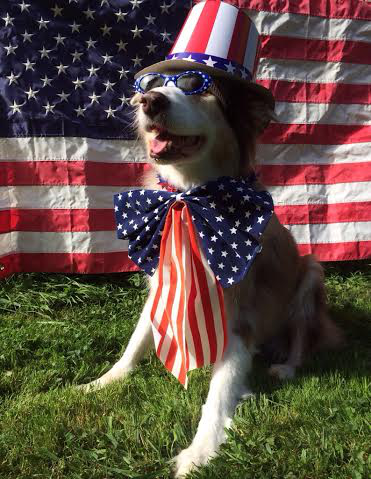

In [79]:
url = master_df.image_url[1253]
response = requests.get(url)
outlier_dog_image = Image.open(BytesIO(response.content))
outlier_dog_image

<span style="color: purple;"> Most common breed on We Rating Dogs<span/>

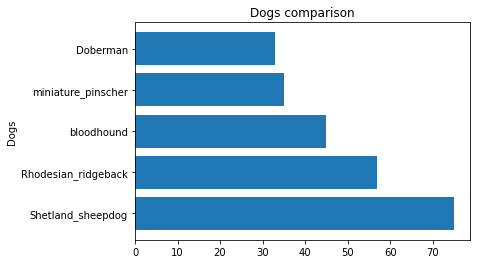

In [59]:
y = list(master_df['third_prediction'].value_counts().head(5))
x = list(master_df['third_prediction'].head(5))
plt.barh(x,y)
plt.title('Dogs comparison')
plt.ylabel('Dogs')
plt.show()

Shetland sheepdog breed is the most common one.

<span style="color: purple;"> Are predictions and images matching?<span/>

In [60]:
shetland =  master_df.query('third_prediction == "Shetland_sheepdog"')
shetland.sort_values('third_confidence', ascending=False).head(2)

tweet_id                                              tweet  \
1546  799757965289017345  This is Sobe. She's a h*ckin happy doggo. Only...   
1649  819588359383371776  This is Jazzy. She just found out that sandwic...   

      rating_numerator  rating_denominator   name dog_type       date  \
1546                13                  10   Sobe    doggo 2016-11-18   
1649                13                  10  Jazzy      NaN 2017-01-12   

                  id_str  retweet_count  favorite_count  ...  \
1546  799757965289017344           2506            9390  ...   
1649  819588359383371776           2271           10606  ...   

                                            image_url first_prediction  \
1546  https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg    Border_collie   
1649  https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg         Cardigan   

     first_confidence  first_dog_prediction  second_prediction  \
1546         0.442534                  True             collie   
1649         0.547935                  True            basenji   

     second_confidence  second_dog_prediction   third_prediction  \
1546          0.288684                   True  Shetland_sheepdog   
1649          0.116442                   True  Shetland_sheepdog   

     third_confidence  third_dog_prediction  
1546         0.196399                  True  
1649         0.101681                  True  

[2 rows x 21 columns]

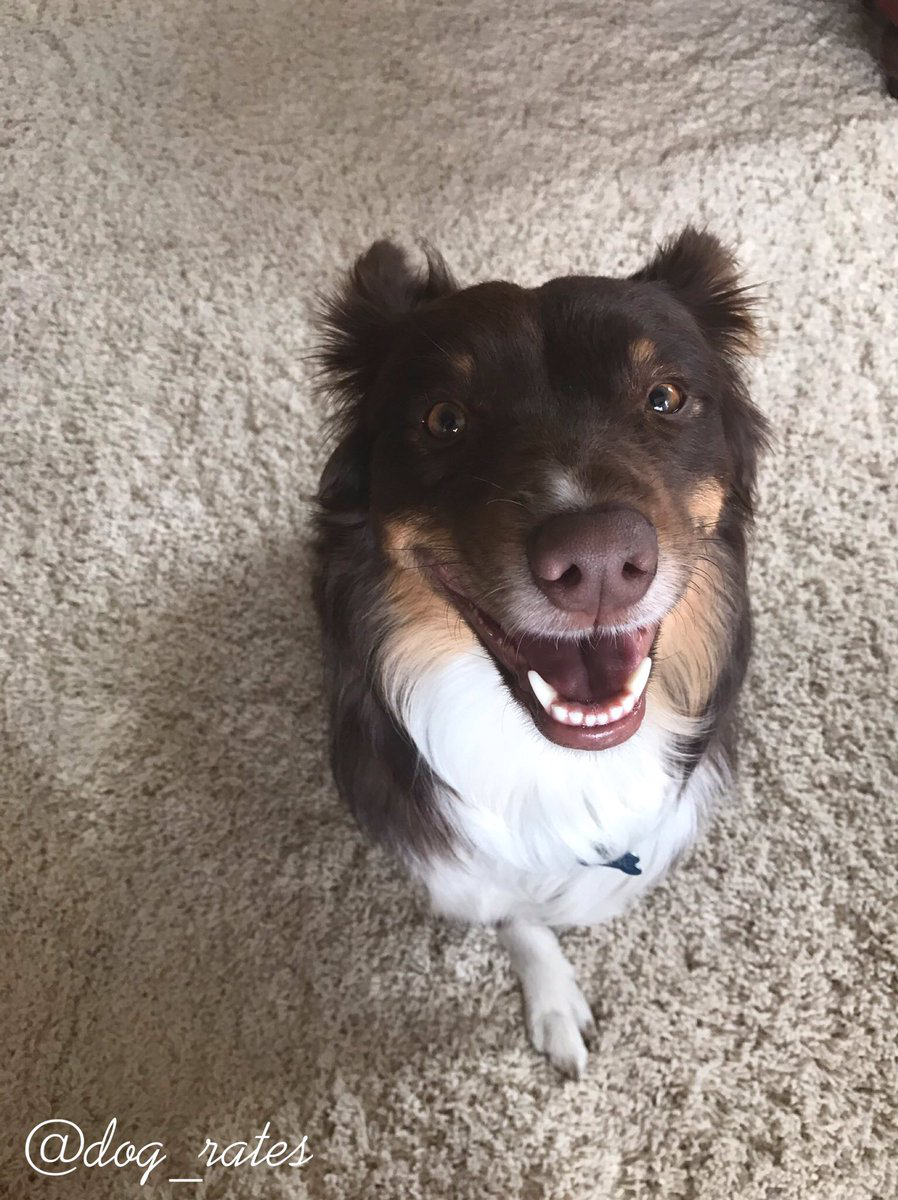

In [62]:
url = master_df.image_url[1546]
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

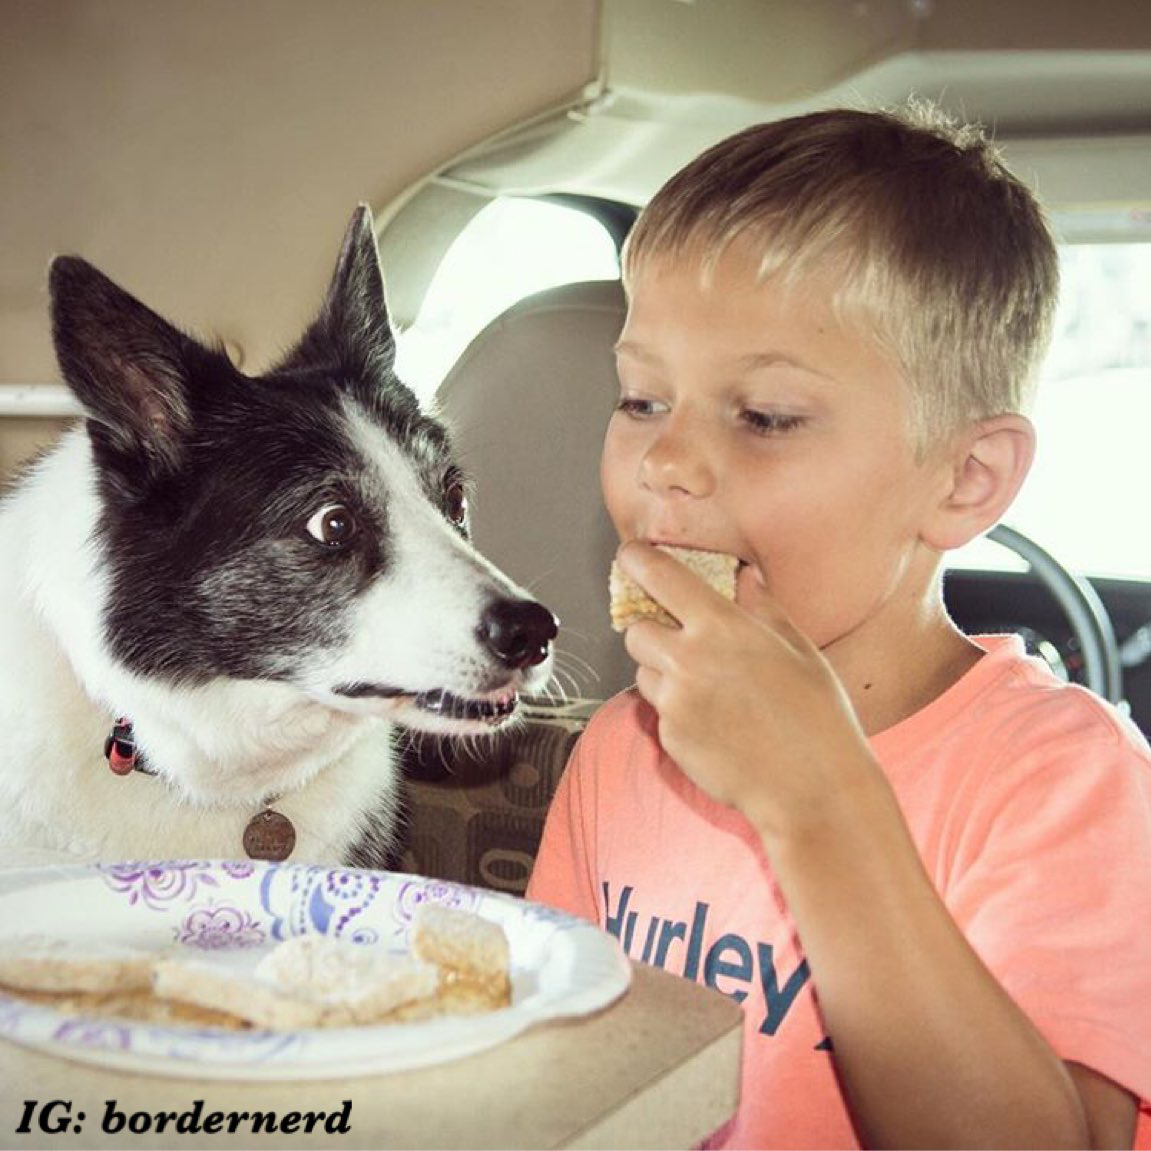

In [63]:
url = master_df.image_url[1649]
response = requests.get(url)
img2 = Image.open(BytesIO(response.content))
img2

img has the highest and img2 has the second highest probabilty of being the dog is a Shetland sheepdog regarding to third_confidence, and they are.

In [64]:
shetland.sort_values('first_confidence', ascending=False).head(1)

tweet_id                                              tweet  \
1785  844979544864018432  PUPDATE: I'm proud to announce that Toby is 23...   

      rating_numerator  rating_denominator name dog_type       date  \
1785                13                  10  NaN      NaN 2017-03-23   

                  id_str  retweet_count  favorite_count  ...  \
1785  844979544864018432           2909           14738  ...   

                                            image_url first_prediction  \
1785  https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg      tennis_ball   

     first_confidence  first_dog_prediction  second_prediction  \
1785         0.999281                 False             racket   

     second_confidence  second_dog_prediction   third_prediction  \
1785           0.00037                  False  Shetland_sheepdog   

     third_confidence  third_dog_prediction  
1785         0.000132                  True  

[1 rows x 21 columns]

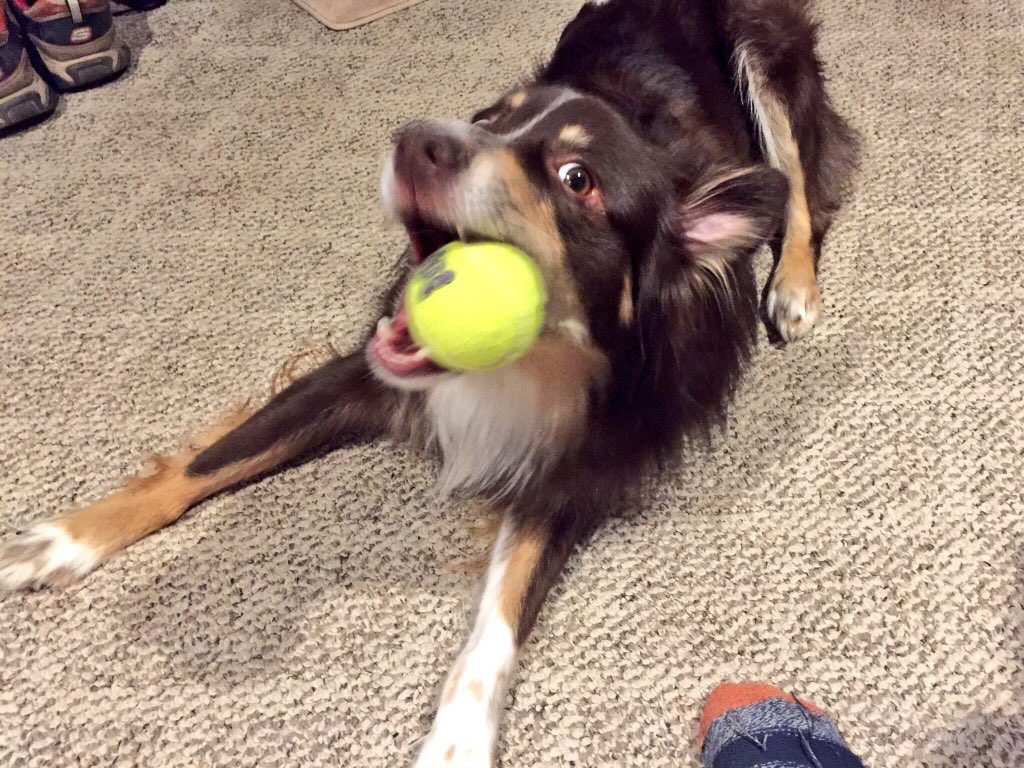

In [65]:
url = master_df.image_url[1785]
response = requests.get(url)
img3 = Image.open(BytesIO(response.content))
img3

img3 has the highest probablity of the dog is a Shetland sheepdog regarding to first_confidence(on avg. approximately 60%). This is also true.

<span style="color: purple;"> Most popular dog types on We Rating Dogs<span/>

In [66]:
pupper_counts = master_df.dog_type.value_counts()['pupper']
non_empty_counts1 = master_df.dog_type.count()
pupper_counts/non_empty_counts1

0.6633986928104575

66% of the dog types is pupper. Tweets are mostly about puppers, i.e. puppies.

In [67]:
doggo_counts = master_df.dog_type.value_counts()['doggo']
doggo_counts/non_empty_counts1

0.20588235294117646

As the second common type, doggo, is only 20% of the total dog types.

<AxesSubplot:ylabel='dog_type'>

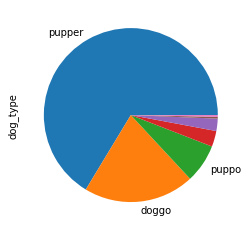

In [68]:
labels = np.full(len(master_df.dog_type.value_counts()), "", dtype=object)
labels[0] = 'pupper'
labels[1] = 'doggo'
labels[2] = 'puppo'
master_df.dog_type.value_counts().plot(kind="pie", labels=labels)

<span style="color: purple;"> The most popular dog name : Charlie<span/>

In [71]:
from collections import Counter

dog_name = master_df['name']

count = Counter(dog_name)
count.most_common(2)

[(nan, 588), ('Charlie', 11)]